<a href="https://colab.research.google.com/github/pjcarney/PyTorch/blob/main/Autograd_Sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor(335.9428)
tensor(-18.2890)
tensor(-11.8562)
tensor(-7.6860)
tensor(-4.9826)
tensor(-3.2301)
tensor(-2.0939)
tensor(-1.3574)
tensor(-0.8800)
tensor(-0.5705)
tensor(-0.3698)
tensor(-0.2397)
tensor(-0.1554)
tensor(-0.1007)
tensor(-0.0653)
tensor(-0.0423)
tensor(-0.0275)
tensor(-0.0178)
tensor(-0.0115)
tensor(-0.0075)
tensor(-0.0048)
tensor(-0.0031)
tensor(-0.0020)
tensor(-0.0013)
tensor(-0.0009)
tensor(-0.0006)
tensor(-0.0004)
tensor(-0.0002)
tensor(-0.0002)
tensor(-9.8884e-05)
tensor(-6.2391e-05)
tensor(-4.1962e-05)
tensor(-2.5541e-05)
tensor(-1.6332e-05)
tensor(-1.1951e-05)
tensor(-5.8413e-06)
tensor(-3.8445e-06)
tensor(-5.0962e-06)
tensor(-1.6689e-06)
tensor(-1.1921e-07)
tensor(-5.8115e-07)
tensor(-4.7684e-07)
tensor(-4.7684e-07)
tensor(3.5763e-07)
tensor(-1.1921e-07)
tensor(3.7253e-07)
tensor(-1.0431e-07)
tensor(3.7253e-07)
tensor(-1.0431e-07)
tensor(3.7253e-07)


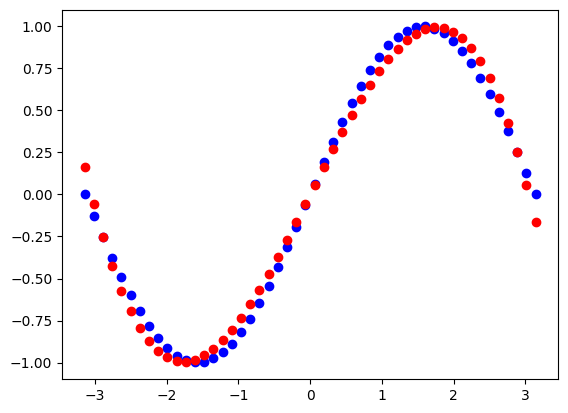

In [ ]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device('cpu')

x = torch.linspace(-math.pi, math.pi, 50, device=device)
y = torch.sin(x)

plt.plot(x, y, 'bo')

# Randomly initialize the weights
a = torch.randn((), device=device, requires_grad=True)
b = torch.randn((), device=device, requires_grad=True)
c = torch.randn((), device=device, requires_grad=True)
d = torch.randn((), device=device, requires_grad=True)

lr = 1e-4

for t in range(5000):

  # Forward pass, calculate the predicted value
  y_pred = a + b * x + c * x ** 2 + d * x ** 3

  # Compute the loss, item converts the tensor to a python number
  loss = (y_pred - y).pow(2).sum()

  #if t % 100 == 0:
  # print(loss)

  # Backprop the compute the gradients of the weights.
  #grad_y_pred = 2.0 * (y_pred - y)

  #grad_a = grad_y_pred.sum()
  #grad_b = (x * grad_y_pred).sum()
  #grad_c = (x ** 2 * grad_y_pred).sum()
  #grad_d = (x ** 3 * grad_y_pred).sum()

  # Compute the gradients of the weights.
  loss.backward()

  # Update the weights

  #a -= lr * grad_a
  #b -= lr * grad_b
  #c -= lr * grad_c
  #d -= lr * grad_d

  if t % 100 == 0:
    print(a.grad)

  with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad
    c -= lr * c.grad
    d -= lr * d.grad

  # Zero out the gradients after updating the weights
  a.grad = None
  b.grad = None
  c.grad = None
  d.grad = None

plt.plot(x.numpy(), y_pred.detach().numpy(), 'ro')
